# Benchmark Analysis: PyPSA vs Modeler

This notebook provides a function to analyze benchmark results for a specific study by row number.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

#Notebook don't know path of the project
project_root = Path().resolve().parent.parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.tests.utils import get_results_path, analyze_benchmark_study

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10




/home/rtei-beg-see-dp/Gems-Development/PyPSA-to-GEMS-Converter/venv/lib/python3.11/site-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [5]:
# Verify CSV file exists and show available studies
results_file = get_results_path()
print(f"📁 Results file path: {results_file}")
print(f"📁 File exists: {results_file.exists()}")

if results_file.exists():
    df = pd.read_csv(results_file)
    print(f"\n📊 Total studies in CSV: {len(df)}")
    print(f"\nAvailable studies:")
    for idx in range(len(df)):
        study_name = df.iloc[idx]['pypsa_network_name']
        print(f"  Row {idx}: {study_name}")
else:
    print(f"\n❌ Error: Results file not found at {results_file}")

📁 Results file path: tmp/benchmark_results/all_studies_results.csv
📁 File exists: False

❌ Error: Results file not found at tmp/benchmark_results/all_studies_results.csv


## Usage

Call the function with a row number (0-indexed) to analyze that study:


BENCHMARK ANALYSIS - STUDY ROW 0

📊 NETWORK INFORMATION:
  Network Name: AC-DC
  Number of Time Steps: 10
  PyPSA Version: 0.34.1
  Antares Version: v9.3.2-rc4

🔧 NETWORK COMPONENTS:
  Buses: 9
  Generators: 6
  Loads: 6
  Links: 11
  Storage Units: 0
  Stores: 0
  Lines: 0
  Transformers: 0
  Shunt Impedances: 0

⏱️  TIMING INFORMATION:
  Parsing Time: 0.1366 s
  Preprocessing Time (PyPSA): 0.0010 s
  PyPSA to GEMS Conversion Time: 0.0428 s
  Build Optimization Problem Time (PyPSA): 0.3655 s
  PyPSA Optimization Time: 0.1775 s
  PyPSA Total Time: 0.5431 s
  Modeler Total Time: 0.0242 s

📈 OPTIMIZATION PROBLEM SIZE:
  PyPSA Constraints: 441
  Modeler Constraints: 452
  Constraints Ratio (PyPSA/Modeler): 0.9757
  PyPSA Variables: 181
  Modeler Variables: 187
  Variables Ratio (PyPSA/Modeler): 0.9679

🎯 OBJECTIVE VALUES:
  PyPSA Objective: 1273531.775449
  Modeler Objective: 1273531.775449
  Difference: -0.000000 (-0.0000%)

⚙️  SOLVER INFORMATION:
  PyPSA Solver: highs 1.12.0
  Modeler 

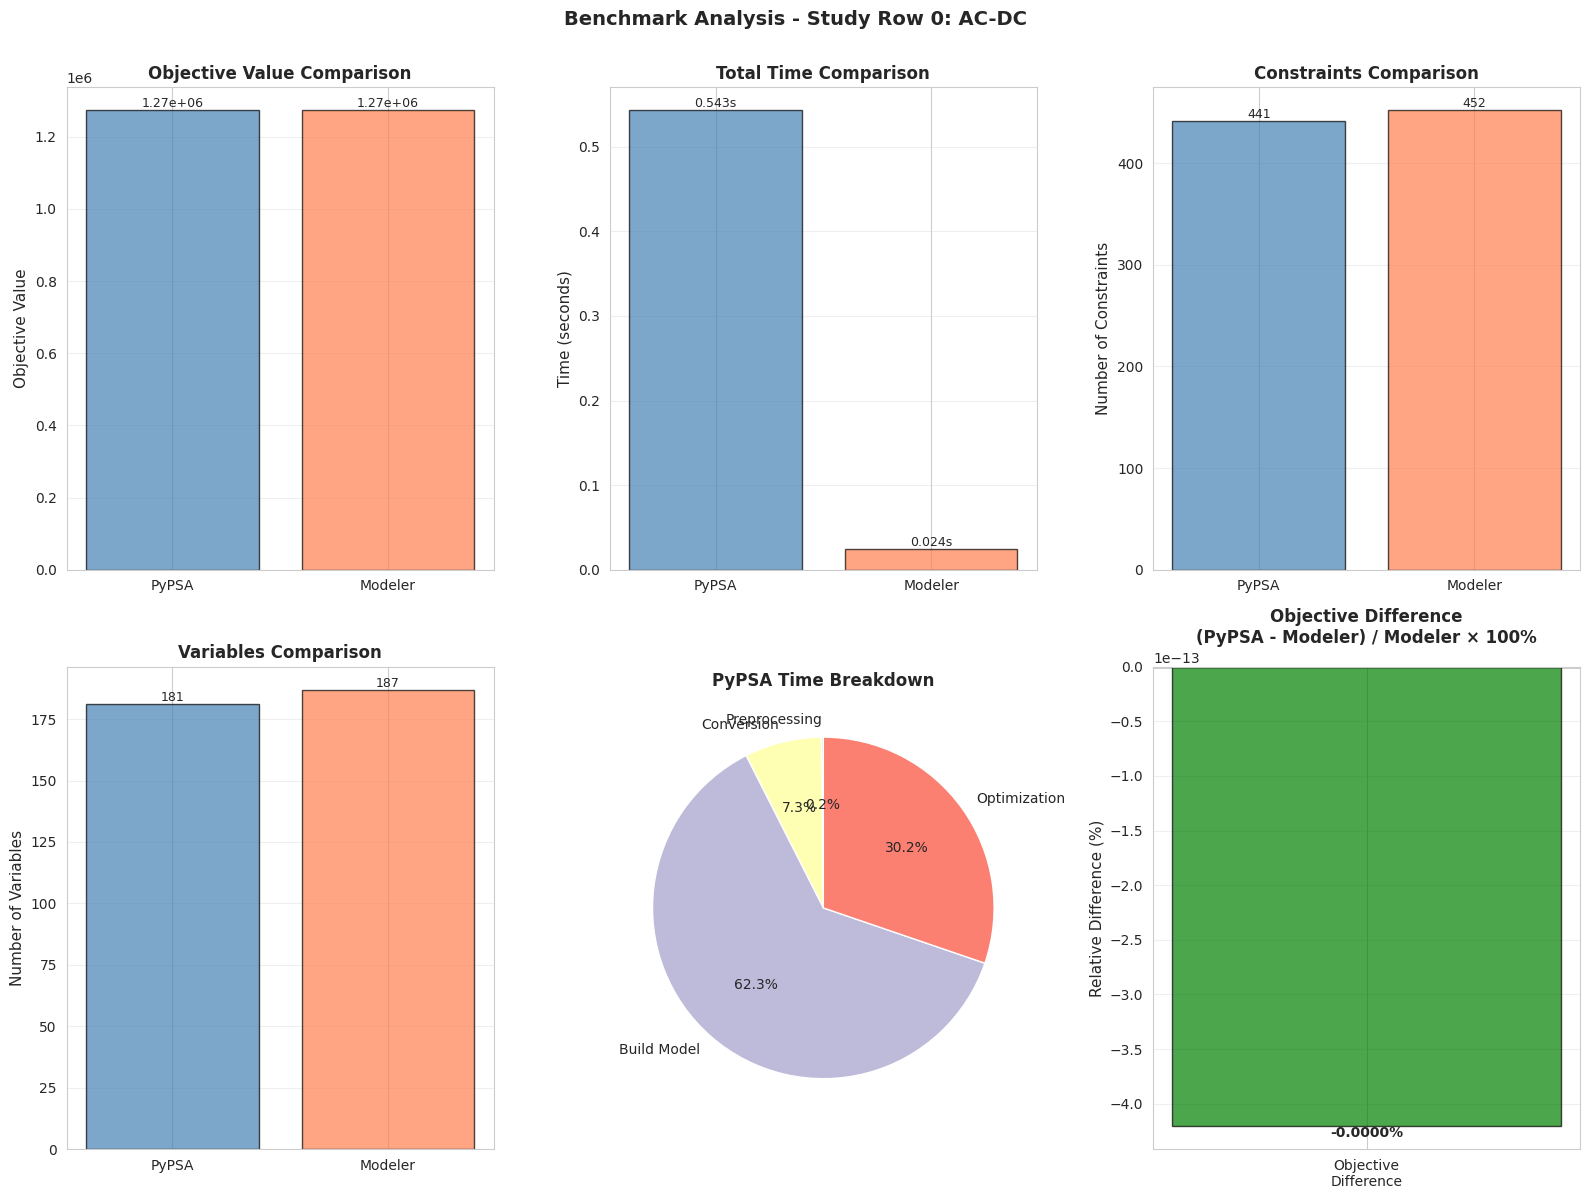

,parsing_time,pypsa_network_name,number_of_time_steps,antares_version,number_of_buses,number_of_generators,number_of_loads,number_of_links,number_of_storage_units,number_of_stores,...,modeler_solver_parameters,modeler_solver_name,build_optimization_problem_time_pypsa,number_of_constraints_pypsa,number_of_variables_pypsa,pypsa_optimization_time,total_time_pypsa,solver_name_pypsa,solver_version_pypsa,pypsa_objective
0,0.136567,AC-DC,10.0,v9.3.2-rc4,9.0,6.0,6.0,11.0,0.0,0.0,...,THREADS 1,highs,0.365546,441.0,181.0,0.177529,0.543075,highs,1.12.0,1.273532e+06


In [9]:
# Example: Analyze study at row 0
analyze_benchmark_study(row_number=0)